In [3]:
import geomstats




INFO: Using numpy backend


In [25]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np

# Clustering of mixture families

### Example for mixture families
Gauss:
$p_0(x;\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2 \sigma^2}\right)$

Cauchy:
$p_1(x;\mu, \gamma) = \frac{1}{\pi} \frac{\gamma}{\gamma^2 + (x - \mu)^2}$

Laplace:
$p_2(x;\mu, b) = \frac{1}{2b} \exp\left( -\frac{|x-\mu|}{b} \right)$


$\rightarrow m(x; \eta) = \eta_1 p_1 + \eta_2 p_2 + (1-\eta_1-\eta_2) p_0$

In [26]:
def gauss(x, mu, sigma):
    return np.exp(-((x - mu)**2) / (2 * sigma**2)) * (1 / (sigma * np.sqrt(2 * np.pi)))

def laplace(x, mu, b):
    return np.exp(-abs(x - mu) / b) / (2 * b)

def cauchy(x, mu, gamma):
    return 1/np.pi * gamma / ((x - mu)**2 + gamma**2)

def mixture(X, m1, m2):
    return m1*cauchy(X, 0, 1) + m2*laplace(X, 3, 1) + (1-m1-m2)*gauss(X, -3, 1)

X = np.linspace(-7, 7, 200)
def f(m1, m2 ):
    plt.plot(X, gauss(X, -3, 1), label='$p_0$ gauss')
    plt.plot(X, cauchy(X, 0, 1), label='$p_2$ cauchy')
    plt.plot(X, laplace(X, 3, 1), label='$p_3$ laplace')
    plt.plot(X, mixture(X, m1, m2), 'black', label='mixture')
    plt.legend()

# interact with sliders
interact(f, m1=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.33), m2=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.33));


interactive(children=(FloatSlider(value=0.33, description='m1', max=1.0, step=0.01), FloatSlider(value=0.33, d…

#### Generate data from arbitrary mixture

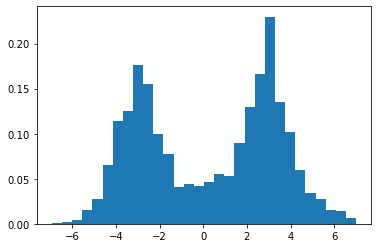

In [6]:
N = 10000

#choose arbitrary mixture to fit
m1= 0.1
m2= 0.5
prob = mixture(X, m1, m2)
prob_norm = prob/sum(prob) #normalize
data = np.random.choice(X, p=prob_norm, size=N)
plt.hist(data, bins=30, density=True);

#### Estimating $B_G$

Notice that $F$ in our case is the ideal negative Shannon entropy:
$$G(\eta) = -h(m(x;\eta)) = \int_{x \in \mathcal{X}} m(x;\eta) \log m(x;\eta) \text{d} \mu (x)$$

We however want to estimate it by using a finite data $S \subset \mathcal{X}$:

$$G(\eta) \approx \tilde{G}_S (\eta) = \frac{1}{m} \sum_{i=1}^m \frac{1}{q(x_i)} \, m(x_i;\eta) \log m(x_i;\eta) $$
where $m= |S|$ and $q(x)$ is the fixed proposal distribution. 

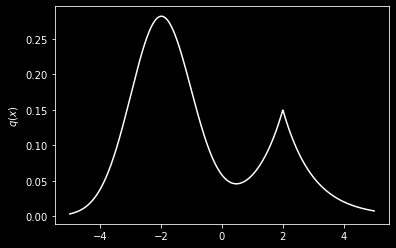

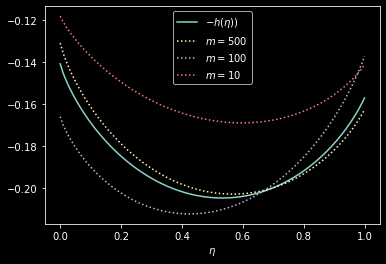

In [28]:
def m(X, eta):
    return (1-eta)*gauss(X, -2,1) + eta*laplace(X, 2, 1)

def shannon_negentropy(X, eta):
    results = []
    for e in eta:
        results.append(np.sum(m(X, e)*np.log(m(X, e)))/len(X))
    return results

def mc_G(X, eta):
    results = []
    for e in eta:
        r = np.sum(m(X, e)*np.log(m(X, e))/m(X,0.3))/len(X)
        results.append(r)
    return results

def reduce_to_N_supports(X, N):
    import random
    random.shuffle(X)
    return X[:N]



X = np.linspace(-5,5,1000)
plt.plot(X, m(X, 0.3), 'black')
plt.ylabel('$q(x)$')
plt.show()

eta = np.linspace(0,1,100)
plt.plot(eta, shannon_negentropy(X, eta), label="$-h(\eta)$)")
plt.plot(eta, shannon_negentropy(reduce_to_N_supports(X, 500), eta),":", label="$m=500$")
plt.plot(eta, shannon_negentropy(reduce_to_N_supports(X,100), eta),":", label="$m=100$")
plt.plot(eta, shannon_negentropy(reduce_to_N_supports(X,10), eta),":", label="$m=10$")
plt.legend()
plt.xlabel("$\eta$")
plt.show();